# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att4_exp'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

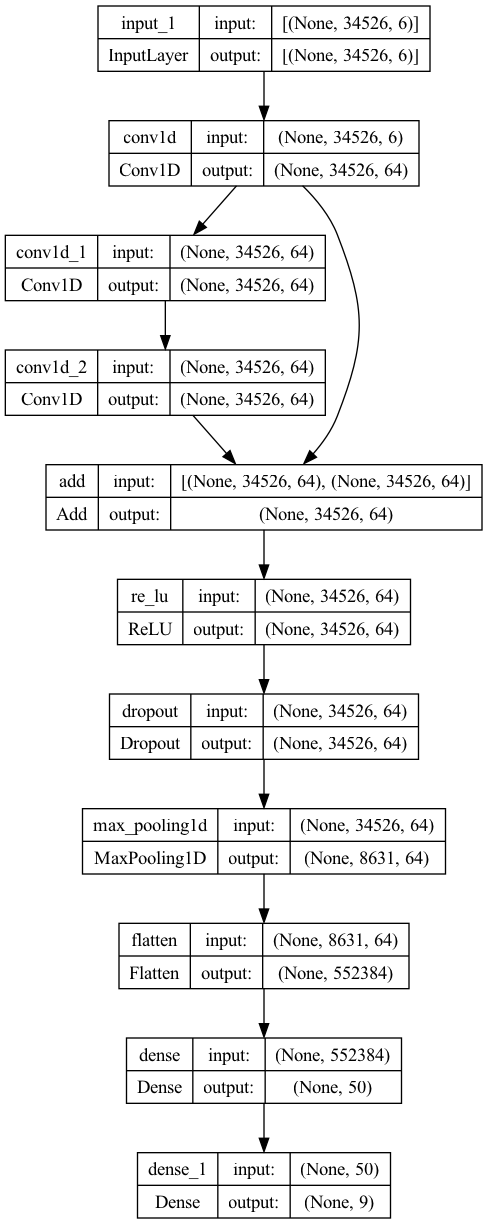

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34526, 64)            3456      ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 34526, 64)            36928     ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 34526, 64)            36928     ['conv1d_1[0][0]']            
                                                                                              

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=2)])

Epoch 1/20
39/39 [==============================] - 892s 23s/step - loss: 2.2448 - ERM: 0.2743 - KDEL: 0.3044 - LMA: 0.1254 - MITO: 0.1284 - NES: 0.1220 - NIK: 0.0819 - NLS: 0.0796 - NUCP: 0.1468 - OMM: 0.0664 - val_loss: 2.2390 - val_ERM: 0.2850 - val_KDEL: 0.2979 - val_LMA: 0.1784 - val_MITO: 0.2544 - val_NES: 0.2036 - val_NIK: 0.1034 - val_NLS: 0.1868 - val_NUCP: 0.0679 - val_OMM: 0.0186
Epoch 2/20
39/39 [==============================] - 888s 23s/step - loss: 2.2314 - ERM: 0.3069 - KDEL: 0.3496 - LMA: 0.1720 - MITO: 0.1595 - NES: 0.1597 - NIK: 0.1471 - NLS: 0.1266 - NUCP: 0.1920 - OMM: 0.0886 - val_loss: 2.2316 - val_ERM: 0.2804 - val_KDEL: 0.3062 - val_LMA: 0.1793 - val_MITO: 0.2320 - val_NES: 0.2381 - val_NIK: 0.1153 - val_NLS: 0.2008 - val_NUCP: 0.0873 - val_OMM: 0.0392
Epoch 3/20
 3/39 [=>............................] - ETA: 12:58 - loss: 2.2267 - ERM: 0.2922 - KDEL: 0.3524 - LMA: 0.1875 - MITO: 0.1256 - NES: 0.1315 - NIK: 0.2023 - NLS: 0.1441 - NUCP: 0.2210 - OMM: 0.0850

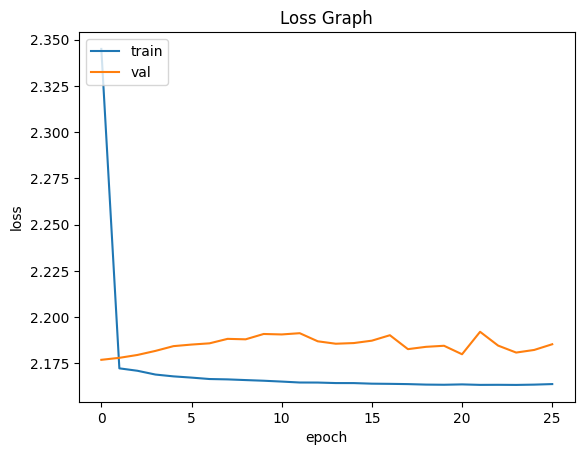

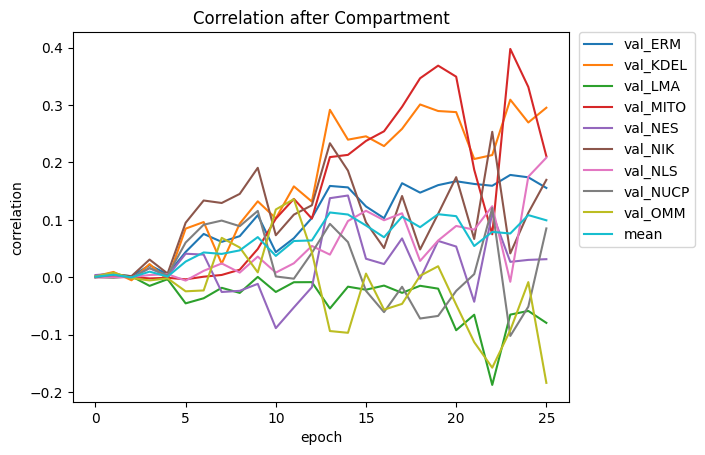

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

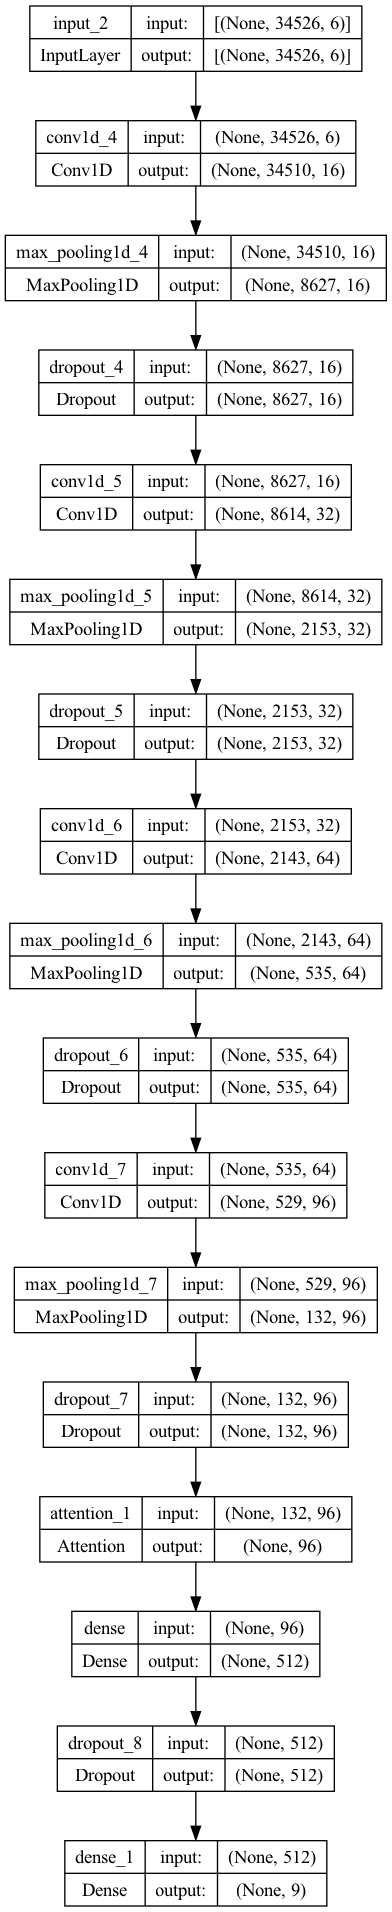

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [ ]:
model.save_model(model_output_path)